In [1]:
import pandas as pd
import numpy as np
import re
import datetime
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

In [3]:
inspections = pd.read_csv("prohlidky.csv")
inspections = inspections.drop(['Unnamed: 0'], axis=1)
inspections.DatKont = pd.to_datetime(inspections.DatKont)
inspections.DatPrvReg = pd.to_datetime(inspections.DatPrvReg)

stations = pd.read_csv("stk_form_pg.csv")

In [4]:
#20 stations with the most inspections
inspections.groupby('STK').count().sort_values(by='DrTP', ascending=False).DrTP.head(20)

STK
3413    73558
3307    50561
3851    35250
3112    33364
3766    31486
3114    31286
3243    27837
3523    27576
3609    27574
3754    26819
3814    26562
3720    25267
3120    25144
3516    24671
3713    23893
3415    23757
3618    23743
3202    23435
3106    23357
3234    22095
Name: DrTP, dtype: int64

In [4]:
#capacity was discovered for these stations:
display(stations[stations.stk_id == 3851])
display(stations[stations.stk_id == 3413])
display(stations[stations.stk_id == 3114])
display(stations[stations.stk_id == 3814])
display(stations[stations.stk_id == 3234])

,stk_id,rozsah_opravneni,psc,mesto,ulice,provozovatel,tel,mail,orp,okres,kraj,cenastk,cenaevkont,cenaemiseb,cenaemisen,pracovnidoba
371,3851,"OA, ZS",783 71,Olomouc,Týnecká 833/39,"'STK '""'""Na Přerovské'""'"" s.r.o.'""""",585155472,stk.naprerovske@seznam.cz,Olomouc,Olomouc,Olomoucký kraj,1000,400,800,800,"Po: 7:00-18:00, Út: 7:00-18:00, St: 7:00-18:00, Čt: 7:00-18:00, Pá: 7:00-18:00"


,stk_id,rozsah_opravneni,psc,mesto,ulice,provozovatel,tel,mail,orp,okres,kraj,cenastk,cenaevkont,cenaemiseb,cenaemisen,pracovnidoba
289,3413,"OA, NA, TRA, ZS",326 00,Plzeň,Koterovská 156a,PLZEŇSKÁ STK s.r.o.,377241224,suchy@stk-plzen.cz,Plzeň-město,Plzeň-město,Plzeňský kraj,940,520,830,930,"Po: 6:00-17:00, Út: 6:00-17:00, St: 6:00-17:00, Čt: 6:00-17:00, Pá: 6:00-17:00"


,stk_id,rozsah_opravneni,psc,mesto,ulice,provozovatel,tel,mail,orp,okres,kraj,cenastk,cenaevkont,cenaemiseb,cenaemisen,pracovnidoba
16,3114,"OA, ZS",101 00,Praha 10,Nad Vršovskou horou 88/4,STK Bohdalec s.r.o.,"267 107 485, 267 107 488",info@stk-bohdalec.cz,Praha,Praha,Hlavní město Praha,1050,850,690,1100,"Po: 7:00-18:00, Út: 7:00-18:00, St: 7:00-18:00, Čt: 7:00-18:00, Pá: 7:00-15:00"


,stk_id,rozsah_opravneni,psc,mesto,ulice,provozovatel,tel,mail,orp,okres,kraj,cenastk,cenaevkont,cenaemiseb,cenaemisen,pracovnidoba
197,3814,"OA, NA, TRA, ZS",702 00,Ostrava,U Řeky 660,"STK-Tajga, Hrabová, s.r.o.","596 734 052, 596 734 053",stk@stk-tajga.cz,Ostrava,Ostrava-město,Moravskoslezský kraj,0,0,0,0,"Po: 6:00-20:00, Út: 6:00-20:00, St: 6:00-20:00, Čt: 6:00-20:00, Pá: 6:00-18:00"


,stk_id,rozsah_opravneni,psc,mesto,ulice,provozovatel,tel,mail,orp,okres,kraj,cenastk,cenaevkont,cenaemiseb,cenaemisen,pracovnidoba
44,3234,"OA, ZS",293 01,Mladá Boleslav,Havlíčkova 1432/II,STK - PECHA v.o.s.,326737780,STK3234@volny.cz,Mladá Boleslav,Mladá Boleslav,Středočeský kraj,900,450,900,900,"Po: 7:00-17:00, Út: 7:00-17:00, St: 7:00-17:00, Čt: 7:00-17:00, Pá: 7:00-15:00, So: 8:00-13:00"


In [5]:
inspections_3851 = inspections[inspections.STK == 3851]
inspections_3413 = inspections[inspections.STK == 3413]
inspections_3814 = inspections[inspections.STK == 3814]
inspections_3114 = inspections[inspections.STK == 3114]
inspections_3234 = inspections[inspections.STK == 3234]

In [ ]:
inspections_per_station = [inspections_3851, inspections_3413, inspections_3814, inspections_3114, inspections_3234]
ids = [3851, 3413, 3814, 3114, 3234]
capacity = [2,8,3,4,2]

capacity_df = pd.DataFrame(columns=['stk_id', 'total', 'ev_control', 'regular', 'capacity', 'working_hours'])

i = 0
for station in inspections_per_station:
    capacity_df.loc[i] = [ids[i]] + [len(station.index)] + [len(station[station.DrTP == 'Evidencni kontrola'][station.Ct == 'M1'].index)] + [len(station[station.DrTP == 'pravidelna'][station.Ct == 'M1'].index)] + [capacity[i]] + [stations[stations.stk_id == ids[i]].pracovnidoba.item()]
    i += 1  

In [9]:
#estimated inspection duration
avg_m1_reg = 27.91
avg_m1_ev = 9.38

#estimated laboriousness 
capacity_df['laboriousness'] = capacity_df['ev_control'] * avg_m1_ev + capacity_df['regular'] * avg_m1_reg

In [22]:
pd.set_option('mode.chained_assignment', None)
capacity_df['avg_hours_per_day'] = np.nan

capacity_df.at[0, 'avg_hours_per_day'] = 11
capacity_df.at[1, 'avg_hours_per_day'] = 11
capacity_df.at[2, 'avg_hours_per_day'] = 13.6
capacity_df.at[3, 'avg_hours_per_day'] = 10.4
capacity_df.at[4, 'avg_hours_per_day'] = 7.17

capacity_df['approx_working_mins'] = capacity_df['avg_hours_per_day'] * 250 * capacity_df['capacity'] * 60

In [23]:
#discovered info
capacity_df

,stk_id,total,ev_control,regular,capacity,working_hours,laboriousness,avg_hours_per_day,approx_working_hours,approx_working_mins
0,3851,35250,6665,18342,2,"Po: 7:00-18:00, Út: 7:00-18:00, St: 7:00-18:00, Čt: 7:00-18:00, Pá: 7:00-18:00",574443,11.00,5500,330000
1,3413,73558,11818,30139,8,"Po: 6:00-17:00, Út: 6:00-17:00, St: 6:00-17:00, Čt: 6:00-17:00, Pá: 6:00-17:00",952032,11.00,22000,1.32e+06
2,3814,26562,3316,11944,3,"Po: 6:00-20:00, Út: 6:00-20:00, St: 6:00-20:00, Čt: 6:00-20:00, Pá: 6:00-18:00",364461,13.60,10200,612000
3,3114,31286,12378,11122,4,"Po: 7:00-18:00, Út: 7:00-18:00, St: 7:00-18:00, Čt: 7:00-18:00, Pá: 7:00-15:00",426521,10.40,10400,624000
4,3234,22095,5696,10747,2,"Po: 7:00-17:00, Út: 7:00-17:00, St: 7:00-17:00, Čt: 7:00-17:00, Pá: 7:00-15:00, So: 8:00-13:00",353377,7.17,3585,215100


In [ ]:
inspections_3851[inspections_3851.Ct == 'M1'].groupby(inspections_3851.DatKont.dt.date).count()['STK'].reset_index().mean()
inspections_3851[inspections_3851.Ct == 'M1'][inspections_3851.DrTP == 'pravidelna'].groupby(inspections_3851.DatKont.dt.date).count()['STK'].reset_index().mean()
inspections_3851[inspections_3851.Ct == 'M1'][inspections_3851.DrTP == 'Evidencni kontrola'].groupby(inspections_3851.DatKont.dt.date).count()['STK'].reset_index().mean()

Text(0, 0.5, 'počet dnů')

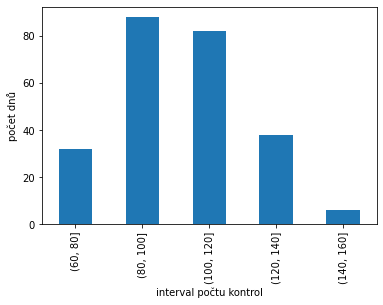

In [143]:
#inspections density (station 3851)
bins= [60, 80, 100, 120, 140, 160]
df = inspections_3851[inspections_3851.Ct == 'M1'].groupby(inspections_3851.DatKont.dt.date).count()
df = df.groupby(pd.cut(df['STK'], bins=bins)).count()
ax = df['DrTP'].plot(kind='bar')

ax.set_xlabel("interval počtu kontrol")
ax.set_ylabel("počet dnů")

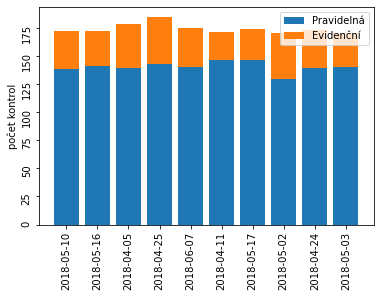

In [194]:
#days with the most inspections
dates = inspections_3851[inspections_3851.Ct == 'M1'].groupby(inspections_3851.DatKont.dt.date).count().sort_values('STK', ascending=False).head(10).index
pr = [] 
ev = []
for date in dates:
    pr.append(inspections_3851[inspections_3851.DatKont.dt.date == date].groupby('DrTP').STK.count().pravidelna)
    ev.append(inspections_3851[inspections_3851.DatKont.dt.date == date].groupby('DrTP').STK.count()['Evidencni kontrola'])fig, ax = plt.subplots()

ax.bar(range(0,10), pr, label='Pravidelná', align='center')
ax.bar(range(0,10), ev, bottom=pr,
       label='Evidenční')

ax.set_xticks(range(0,10))
ax.set_xticklabels(dates)
ax.set_ylabel('počet kontrol')
ax.tick_params(labelrotation=90)
ax.legend()

plt.show()